### Question 3

In [1]:
import pickle
from collections import Counter
import numpy as np
import seaborn as sns
from prettytable import PrettyTable
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
classes = ['comp.graphics', 'rec.sport.hockey', 'sci.med', 'sci.space', 'talk.politics.misc']
with open('C:/Users/HP/Downloads/Doc_pdAssignment2.pickle', 'rb') as f:
    data = pickle.load(f)

In [5]:
data

,0,1
0,"[newsgroup, sci, space, path, cantaloup, srv, ...",comp.graphics
1,"[path, cantaloup, srv, cs, cmu, edu, da, news,...",comp.graphics
2,"[xref, cantaloup, srv, cs, cmu, edu, rec, nude...",comp.graphics
3,"[path, cantaloup, srv, cs, cmu, edu, da, news,...",comp.graphics
4,"[xref, cantaloup, srv, cs, cmu, edu, talk, pol...",comp.graphics
...,...,...
4995,"[path, cantaloup, srv, cs, cmu, edu, rochest, ...",talk.politics.misc
4996,"[xref, cantaloup, srv, cs, cmu, edu, comp, gra...",talk.politics.misc
4997,"[newsgroup, comp, graphic, path, cantaloup, sr...",talk.politics.misc
4998,"[xref, cantaloup, srv, cs, cmu, edu, comp, gra...",talk.politics.misc


In [6]:
#Splitting of data randomly depending on ratios
def spliting_data(data,ratio):
    rand_bool = np.random.rand(len(data)) < ratio
    train = data[rand_bool]
    test = data[~rand_bool]
    return train,test

In [7]:
def reset_index(train_data,test_data):
    train = train_data.reset_index(drop=True)
    test = test_data.reset_index(drop=True)
    train_class_split = Counter(train[1])
    print(train_class_split)
    return train,test,train_class_split

In [8]:
#counting number of words in a perticular class
def class_words(train_data):
    word_dict= {}
    for i in range(0,len(train_data)):
        try:
            word_dict[train_data[1][i]] = word_dict[train_data[1][i]] + train_data[0][i]
        except:
            word_dict[train_data[1][i]] = train_data[0][i]
    return word_dict

In [9]:
 #counting number of UNIQUE words in a perticular class
def calulate_unique_word(word_dict):
    distinct_words = set()
    for i in word_dict:
        distinct_words = distinct_words | set(word_dict[i])
    distinct_words_c = len(distinct_words)
    return distinct_words,distinct_words_c

In [10]:
#class frequency for each word
def calculate_CF(word_dict):
    CF = {}

    #creating the list for each class
    for i in word_dict:
        for w in set(word_dict[i]):
            CF[w] = []

    for i in word_dict:
        for w in set(word_dict[i]):
            if i == 'comp.graphics':
                CF[w].append(i)
            elif i == 'rec.sport.hockey':
                CF[w].append(i)
            elif i == 'sci.med':
                CF[w].append(i)
            elif i == 'sci.space':
                CF[w].append(i)        
            else:
                CF[w].append(i)
    for k , v in CF.items():
        CF[k] = len(v)
    return CF

In [11]:
def class_freq(word,CF):
    rand = 0
    try:
        rand = CF[word]
    except:
        pass
    return rand

In [12]:
def calculate_tficf(word_dict,CF):
    tf_icf = {}
    N=5
    for i in word_dict:
        dumy_dict={}
        count=Counter(word_dict[i])
        w_count=len(word_dict[i])
        for word in set(word_dict[i]):
            term_freq = count[word]/w_count
            clas_freq = class_freq(word,CF)
            inv_class_freq = np.log((N)/(clas_freq))
            dumy_dict[word] = term_freq*inv_class_freq
        tf_icf[i] = dumy_dict
    return tf_icf

In [13]:
def tficf_k_feature(TF_ICF,feature_values):
    featTFICF=[]
    k_feature={}
    for i in TF_ICF.keys():
        c_feature=[]
        every_sk = sorted(TF_ICF[i], key=TF_ICF[i].get, reverse=True)
        for j in every_sk[0:int(feature_values)]:
            featTFICF.append(j)
            c_feature.append(j)
        k_feature[i] = c_feature
    return k_feature,featTFICF

In [14]:
def freq_count(classes,featTFICF,k_feature):
    class_f = {}
    class_c = {}

    for i in classes:
        counter_kFeature = Counter(k_feature[i])
        for j in featTFICF:
            class_f[i, j] = counter_kFeature[j]
            try:
                class_c[i] = class_c[i] + counter_kFeature[j]
            except:
                class_c[i] = counter_kFeature[j]
    return class_f,class_c

In [15]:
def frequency(word, label,class_f,class_c):
    try:
        return class_f[label, word], class_c[label]
    except:
        return 0, class_c[label]

In [16]:
#Naive Bayes classifier
def NaiveBayes(distinct_words_c,train_class_split,train_data,test_data,cls,class_f,class_c):
    true_values = []
    pred_values = []
    for i in range(test_data.shape[0]):
        true_values.append(test_data[1][i])
        prob_classesWord = []
        for l in cls:
            prob_w = 0
            for w in test_data[0][i]:
                freq, count = frequency(w, l,class_f,class_c)
                pp = (freq + 1) / (count + distinct_words_c)
                prob_w += np.log(pp)
            prob_w += np.log(train_class_split[l] / train_data.shape[0])            
            prob_classesWord.append(prob_w)           
        pred_values.append(cls[np.argmax(prob_classesWord)])        
    return true_values,pred_values

In [17]:
def accuracy(predicted, true):
    c = len([1 for i in range(len(predicted)) if predicted[i]==true[i]])
    return c/len(predicted)

In [18]:
def confusion_matrix(predicted, true,classes):
    confusion = np.zeros((len(classes), len(classes))).astype(int)
    for i in range(len(predicted)):
        confusion[classes.index(predicted[i])][classes.index(true[i])] += 1
    return confusion

In [19]:
def heatmap(conf_mat):
    sns.heatmap(conf_mat/np.sum(conf_mat), annot=True, fmt='.2%', cmap='Blues')

In [20]:
def RunnerFunction(data,ratio):
    train_data,test_data = spliting_data(data,ratio)
    train_data,test_data,train_class_split = reset_index(train_data,test_data)
    word_dict = class_words(train_data)
    distinct_words,distinct_words_c = calulate_unique_word(word_dict)
    CF = calculate_CF(word_dict)
    tficf = calculate_tficf(word_dict,CF)
    feature_values = [10,20,40,60]
    for f_values in feature_values:
        k_feature,featTFICF = tficf_k_feature(tficf,f_values)
        class_f,class_c = freq_count(classes,featTFICF,k_feature)
        true_values,pred_values = NaiveBayes(distinct_words_c,train_class_split,train_data,test_data,classes,class_f,class_c)
        acc = accuracy(pred_values,true_values)
        print("Accuracy at %0.1f and at feature value %d : " % (ratio,f_values),acc)
        conf = confusion_matrix(pred_values,true_values,classes)
        print(conf)
        features.append(f_values)
        pref.append(acc)
        train_size.append(ratio)

In [21]:
features = []
pref = []
train_size = []
ratios = [0.5,0.7,0.8]
for r in ratios:
    RunnerFunction(data,r)

Counter({'talk.politics.misc': 538, 'rec.sport.hockey': 518, 'comp.graphics': 501, 'sci.med': 488, 'sci.space': 461})
Accuracy at 0.5 and at feature value 10 :  0.7794707297514034
[[315   1   0   5   0]
 [170 470   0  36   2]
 [  0   0 512   7   0]
 [  0   0   0 187   0]
 [ 14  11   0 304 460]]
Accuracy at 0.5 and at feature value 20 :  0.8448275862068966
[[381   4   0   6   0]
 [102 462   0  77   2]
 [  0   1 512   4   0]
 [  0   4   0 293   1]
 [ 16  11   0 159 459]]
Accuracy at 0.5 and at feature value 40 :  0.9125902165196471
[[400   6   0   3   3]
 [ 85 452   0  21   2]
 [  1   3 510   2   1]
 [  0  13   2 459   1]
 [ 13   8   0  54 455]]
Accuracy at 0.5 and at feature value 60 :  0.9366479550922213
[[431  10   0   5   2]
 [ 52 449   0  16   2]
 [  2   1 511   2   1]
 [  2  15   1 489   1]
 [ 12   7   0  27 456]]
Counter({'rec.sport.hockey': 715, 'sci.med': 705, 'sci.space': 696, 'comp.graphics': 695, 'talk.politics.misc': 685})
Accuracy at 0.7 and at feature value 10 :  0.8384308

In [22]:
res = PrettyTable()
res.field_names = ["% OF TRAINING DATA CONSIDERED", "FEATURES(TF-ICF BASED) SELECTED/CLASS ","ACCURACY"]
for i in range(len(train_size)):
    res.add_row([str(round(train_size[i]*100))+" %",str(round(features[i])), str(pref[i]*100)+" %"])
print(res)

+-------------------------------+----------------------------------------+---------------------+
| % OF TRAINING DATA CONSIDERED | FEATURES(TF-ICF BASED) SELECTED/CLASS  |       ACCURACY      |
+-------------------------------+----------------------------------------+---------------------+
|              50 %             |                   10                   | 77.94707297514034 % |
|              50 %             |                   20                   | 84.48275862068965 % |
|              50 %             |                   40                   | 91.25902165196472 % |
|              50 %             |                   60                   | 93.66479550922213 % |
|              70 %             |                   10                   | 83.84308510638297 % |
|              70 %             |                   20                   | 88.56382978723404 % |
|              70 %             |                   40                   |  93.2845744680851 % |
|              70 %           

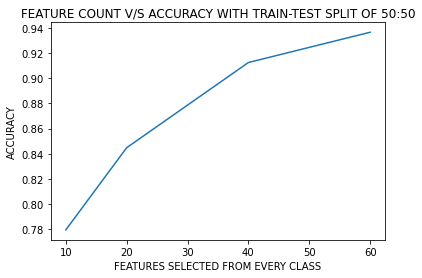

In [23]:
plt.plot(features[0:4],pref[0:4])
plt.xlabel("FEATURES SELECTED FROM EVERY CLASS")
plt.ylabel("ACCURACY")
plt.title("FEATURE COUNT V/S ACCURACY WITH TRAIN-TEST SPLIT OF 50:50")
plt.show()

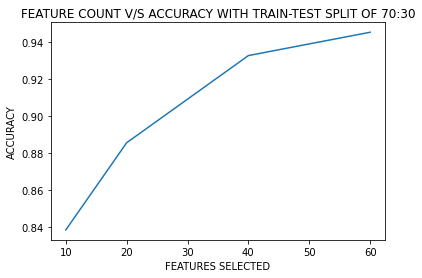

In [24]:
plt.plot(features[4:8],pref[4:8])
plt.xlabel("FEATURES SELECTED")
plt.ylabel("ACCURACY")
plt.title("FEATURE COUNT V/S ACCURACY WITH TRAIN-TEST SPLIT OF 70:30")
plt.show()

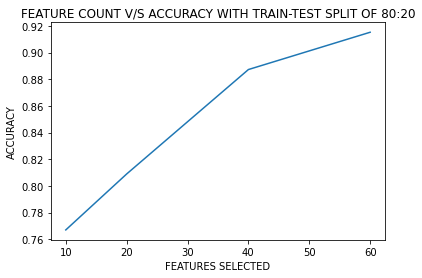

In [25]:
plt.plot(features[8:12],pref[8:12])
plt.xlabel("FEATURES SELECTED")
plt.ylabel("ACCURACY")
plt.title("FEATURE COUNT V/S ACCURACY WITH TRAIN-TEST SPLIT OF 80:20")
plt.show()

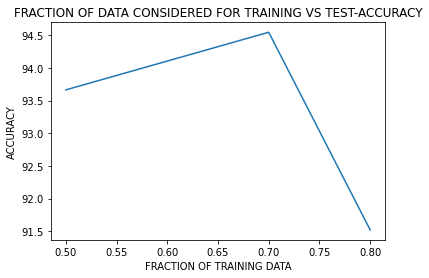

In [26]:
plt.plot([train_size[3],train_size[7],train_size[11]],[pref[3]*100,pref[7]*100,pref[11]*100])
plt.xlabel("FRACTION OF TRAINING DATA")
plt.ylabel("ACCURACY")
plt.title("FRACTION OF DATA CONSIDERED FOR TRAINING VS TEST-ACCURACY")
plt.show()